<a href="https://colab.research.google.com/github/bivek-shrestha/Explanatory-Data-Analysis/blob/main/Explanatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section-C: Explanatory Data Analysis**

Initialization

In [ ]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

I loaded the data from the database stored at the google drive into the colab file.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conn = sqlite3.connect('/content/drive/MyDrive/datascience_sqlite/queue_system_sqlite3.db')


I loaded the data into the dataframe.

In [ ]:
calls_df = pd.read_sql_query("SELECT * FROM calls", conn)
queues_df = pd.read_sql_query("SELECT * FROM queues", conn)
services_df = pd.read_sql_query("SELECT * FROM services", conn)
counters_df = pd.read_sql_query("SELECT * FROM counters", conn)
users_df = pd.read_sql_query("SELECT * FROM users", conn)

I displayed the loaded dataframes using head() command

In [ ]:
calls_df.head(), queues_df.head(), services_df.head(), counters_df.head(), users_df.head()


(   id  queue_id  service_id  counter_id  user_id token_letter  token_number  \
 0  28        45           1           2        2            W             1   
 1  29        46           1           2        2            W             2   
 2  30        48           2           2        2           NR             1   
 3  31        47           1           2        2            W             3   
 4  32        50           3           3        2            T             1   
 
   called_date           started_at             ended_at waiting_time  \
 0  2024-01-25  2024-01-25 18:26:13  2024-01-25 18:34:14     00:06:45   
 1  2024-01-25  2024-01-25 18:34:16  2024-01-25 18:34:24     00:13:39   
 2  2024-01-25  2024-01-25 18:34:53                 None     00:00:13   
 3  2024-01-25  2024-01-25 18:35:14  2024-01-25 18:35:18     00:10:17   
 4  2024-01-25  2024-01-25 18:35:58  2024-01-25 18:37:00     00:00:29   
 
   served_time turn_around_time           created_at           updated_at  \
 

**Task 7.1: Data Preperation, cleaning and preprocessing**

Checking for the missing values.[The null values present in the data were counted]



In [ ]:

calls_missing = calls_df.isnull().sum()
queues_missing = queues_df.isnull().sum()
services_missing = services_df.isnull().sum()
counters_missing = counters_df.isnull().sum()
users_missing = users_df.isnull().sum()

# Display missing values
calls_missing, queues_missing, services_missing, counters_missing, users_missing


(id                    0
 queue_id              0
 service_id            0
 counter_id            0
 user_id               0
 token_letter          0
 token_number          0
 called_date           0
 started_at            0
 ended_at             19
 waiting_time          0
 served_time         617
 turn_around_time    617
 created_at            0
 updated_at            0
 call_status_id       19
 dtype: int64,
 id                 0
 service_id         0
 number             0
 called             0
 reference_no       0
 letter             0
 name            3374
 email           3374
 phone           3374
 position           0
 created_at         0
 updated_at         0
 dtype: int64,
 id                           0
 name                         0
 letter                       0
 start_number                 0
 status                       0
 sms_enabled                  0
 optin_message_enabled        0
 call_message_enabled         0
 noshow_message_enabled       0
 completed_message

I handled the missing values for data cleaning by using ".fillna" in various sample dataframes I used.

In [ ]:
# Handling missing values in calls_df
calls_df['ended_at'].fillna('2024-07-28', inplace=True)
calls_df['served_time'].fillna('00:00:00', inplace=True)
calls_df['turn_around_time'].fillna('00:00:00', inplace=True)
calls_df['call_status_id'].fillna(-1, inplace=True)  # Assuming -1 represents missing status

# Handling missing values in services_df
default_message_format = 'Default format'
services_df['optin_message_format'].fillna(default_message_format, inplace=True)
services_df['call_message_format'].fillna(default_message_format, inplace=True)
services_df['noshow_message_format'].fillna(default_message_format, inplace=True)
services_df['completed_message_format'].fillna(default_message_format, inplace=True)
services_df['status_message_format'].fillna(default_message_format, inplace=True)
services_df['status_message_positions'].fillna('Default positions', inplace=True)

# Handling missing values in users_df
users_df['email_verified_at'].fillna('2024-07-28', inplace=True)
users_df['remember_token'].fillna('No token', inplace=True)
users_df['image'].fillna('No image', inplace=True)


Finally, I checked for the null remained.

In [ ]:

calls_df.isnull().sum(), services_df.isnull().sum(), users_df.isnull().sum()

(id                  0
 queue_id            0
 service_id          0
 counter_id          0
 user_id             0
 token_letter        0
 token_number        0
 called_date         0
 started_at          0
 ended_at            0
 waiting_time        0
 served_time         0
 turn_around_time    0
 created_at          0
 updated_at          0
 call_status_id      0
 dtype: int64,
 id                           0
 name                         0
 letter                       0
 start_number                 0
 status                       0
 sms_enabled                  0
 optin_message_enabled        0
 call_message_enabled         0
 noshow_message_enabled       0
 completed_message_enabled    0
 status_message_enabled       0
 optin_message_format         0
 call_message_format          0
 noshow_message_format        0
 completed_message_format     0
 status_message_format        0
 status_message_positions     0
 ask_name                     0
 name_required                0
 ask_emai

**Task 7.2: Descriptive Statistics for "waiting-time", "served-time", "turn-around-time", "Volume of customers served"**

I converted required time columns to timedelta for standardization and accuracy.

In [ ]:

# Convert time columns to timedelta
calls_df['waiting_time'] = pd.to_timedelta(calls_df['waiting_time'])
calls_df['served_time'] = pd.to_timedelta(calls_df['served_time'])
calls_df['turn_around_time'] = pd.to_timedelta(calls_df['turn_around_time'])
calls_df['called_date'] = pd.to_datetime(calls_df['called_date'])

# Calculate descriptive statistics for waiting time, served time, turn-around time, called_date.
waiting_time_stats = calls_df['waiting_time'].describe()
served_time_stats = calls_df['served_time'].describe()
turn_around_time_stats = calls_df['turn_around_time'].describe()
daily_customers_served = calls_df.groupby('called_date').size()
descriptive_stats = daily_customers_served.describe()

# Display the statistics
print("Waiting Time Statistics:\n", waiting_time_stats)
print("\nServed Time Statistics:\n", served_time_stats)
print("\nTurn-around Time Statistics:\n", turn_around_time_stats)
print("Volume of Customers Served statistics:", descriptive_stats)



Waiting Time Statistics:
 count                         3354
mean     0 days 01:10:08.298151460
std      0 days 00:49:17.112034032
min                0 days 00:00:00
25%         0 days 00:29:31.250000
50%         0 days 01:02:42.500000
75%         0 days 01:40:31.500000
max                0 days 04:55:13
Name: waiting_time, dtype: object

Served Time Statistics:
 count                         3354
mean     0 days 00:09:57.442158616
std      0 days 00:11:35.103846039
min                0 days 00:00:00
25%         0 days 00:02:14.250000
50%         0 days 00:08:48.500000
75%                0 days 00:13:55
max                0 days 03:03:44
Name: served_time, dtype: object

Turn-around Time Statistics:
 count                         3354
mean     0 days 01:06:15.805605247
std      0 days 00:55:52.026919612
min                0 days 00:00:00
25%         0 days 00:20:21.500000
50%                0 days 00:56:29
75%         0 days 01:42:06.500000
max                0 days 05:18:21
Name: turn

**Task 7.3: Visualization**

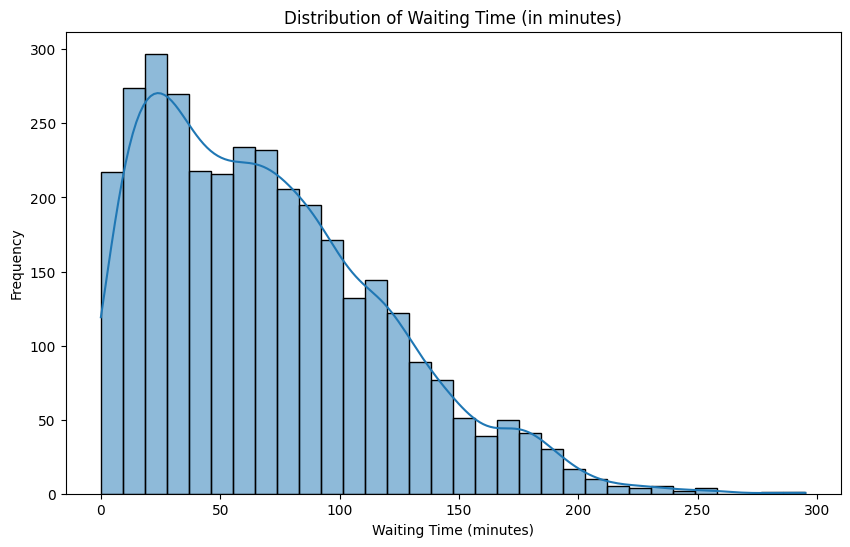

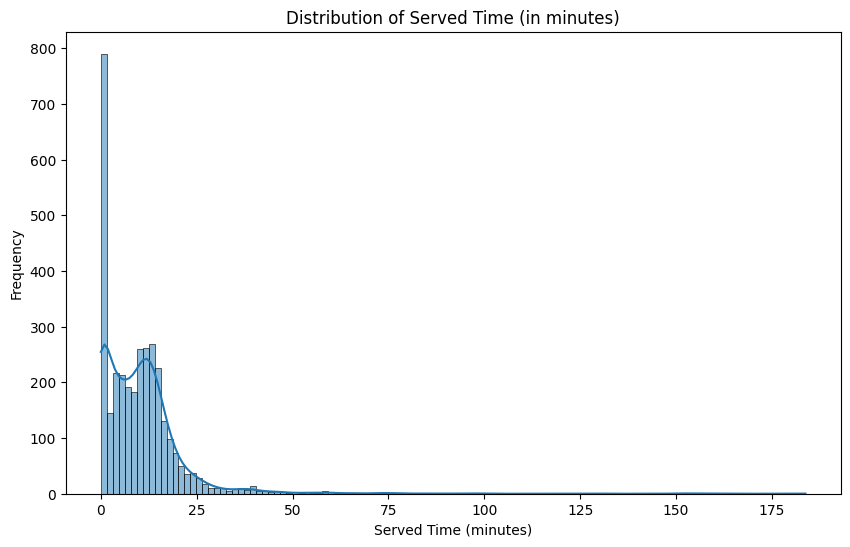

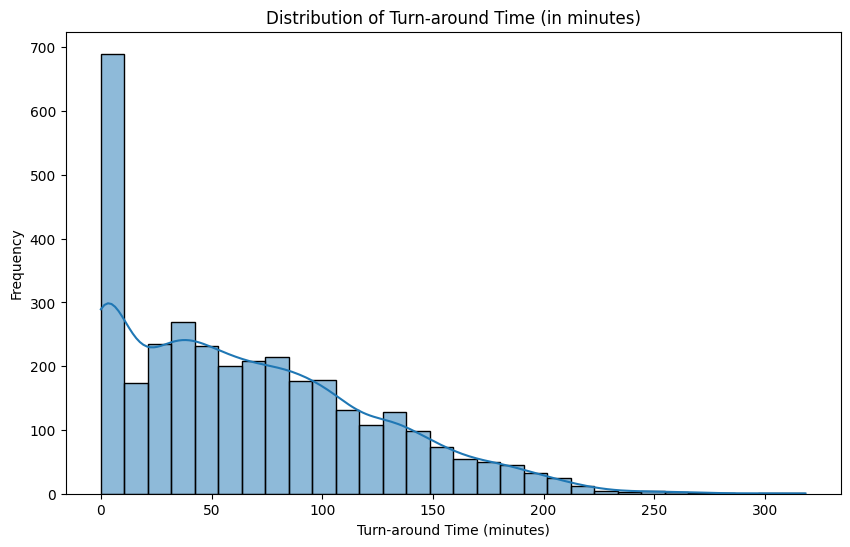

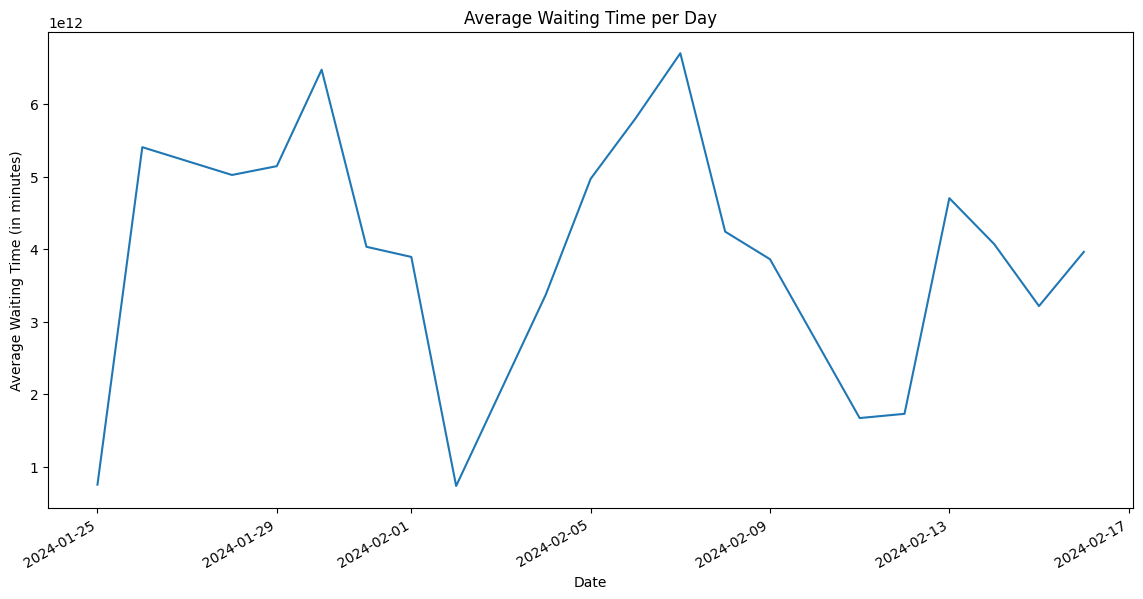

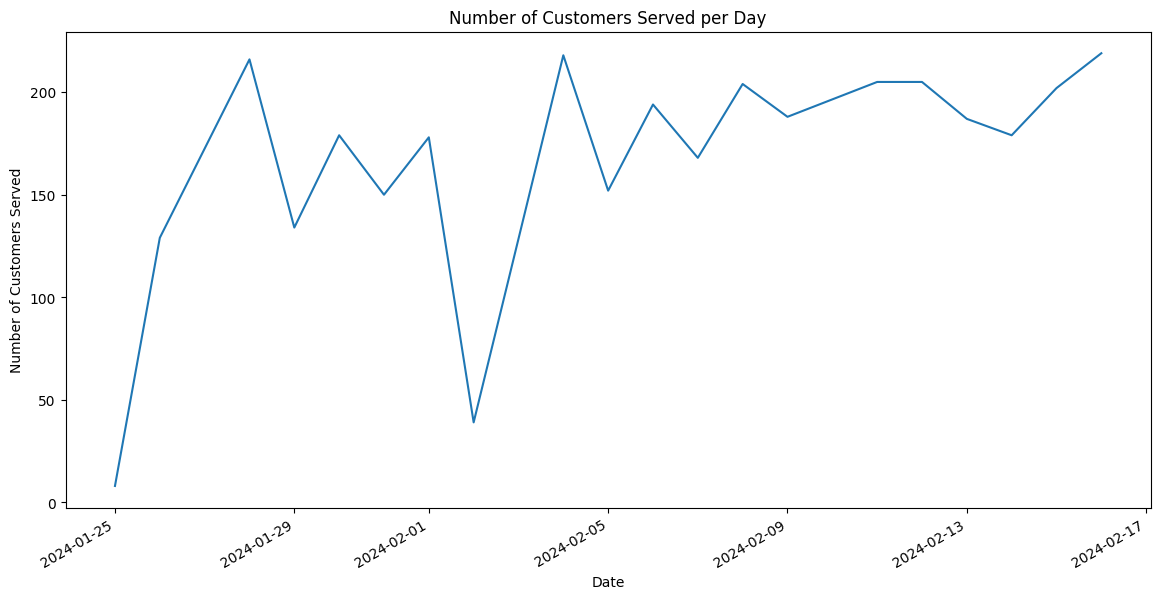

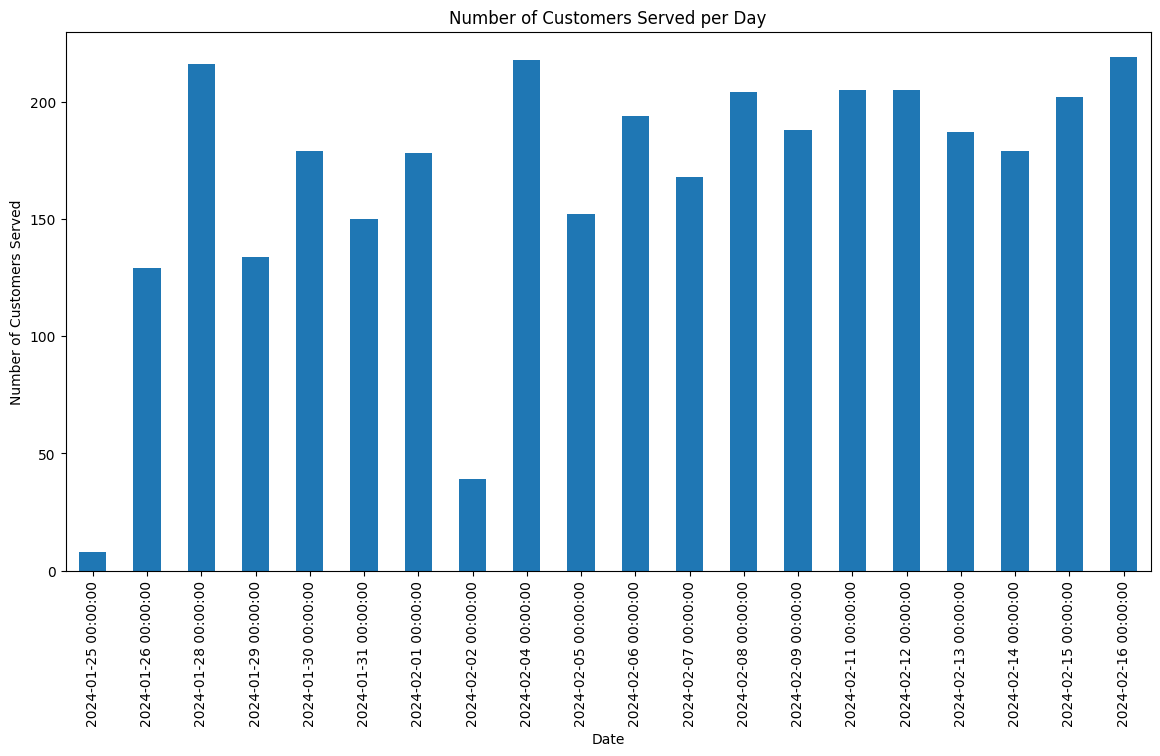

In [ ]:

# Distribution of Waiting Time
plt.figure(figsize=(10, 6))
sns.histplot(calls_df['waiting_time'].dt.total_seconds() / 60, kde=True)
plt.title('Distribution of Waiting Time (in minutes)')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Served Time
plt.figure(figsize=(10, 6))
sns.histplot(calls_df['served_time'].dt.total_seconds() / 60, kde=True)
plt.title('Distribution of Served Time (in minutes)')
plt.xlabel('Served Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Turn-around Time
plt.figure(figsize=(10, 6))
sns.histplot(calls_df['turn_around_time'].dt.total_seconds() / 60, kde=True)
plt.title('Distribution of Turn-around Time (in minutes)')
plt.xlabel('Turn-around Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Group by date and calculate the average waiting time per day
calls_df['called_date'] = pd.to_datetime(calls_df['called_date'])
daily_avg_waiting_time = calls_df.groupby('called_date')['waiting_time'].mean()

plt.figure(figsize=(14, 7))
daily_avg_waiting_time.plot()
plt.title('Average Waiting Time per Day')
plt.xlabel('Date')
plt.ylabel('Average Waiting Time (in minutes)')
plt.show()


# Number of Customers Served per Day
plt.figure(figsize=(14, 7))
daily_customers_served.plot()
plt.title('Number of Customers Served per Day')
plt.xlabel('Date')
plt.ylabel('Number of Customers Served')
plt.show()

# Group by date and calculate the number of customers served per day
daily_customers_served = calls_df.groupby('called_date')['id'].count()

plt.figure(figsize=(14, 7))
daily_customers_served.plot(kind='bar')
plt.title('Number of Customers Served per Day')
plt.xlabel('Date')
plt.ylabel('Number of Customers Served')
plt.show()

Task 7.4: Correalation and Insights

I calculated the correlation matrix which is then used for creating the heatmap using seaborn.

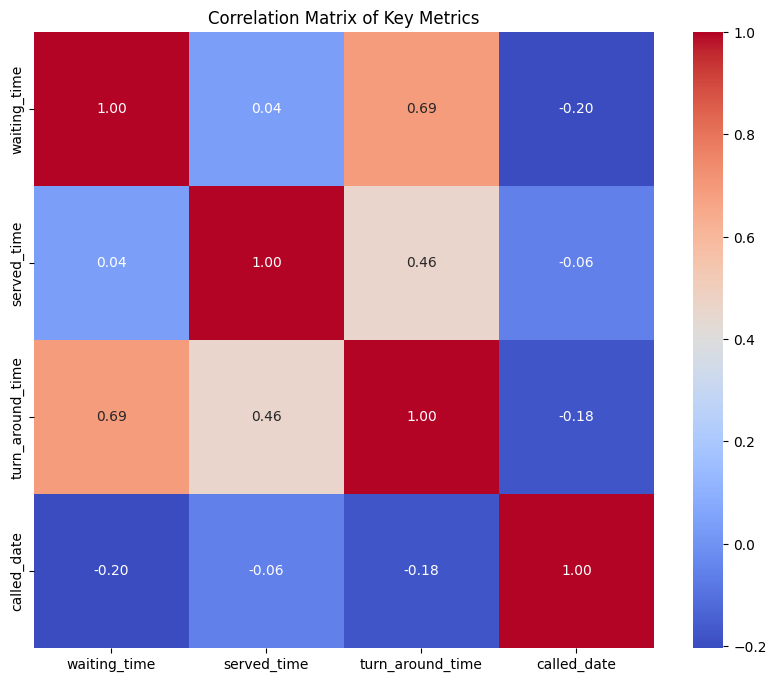

In [ ]:
# Calculate correlation matrix
correlation_matrix = calls_df[['waiting_time', 'served_time', 'turn_around_time','called_date']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Metrics')
plt.show()

**Submitted by: Bivek Shrestha**